In [1]:
# You have to work with Salries.csv file for this test.
# you'll need to primarily use numpy, pandas and matplotlib for this

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

#  Read Salaries.csv as a dataframe called salary
salary = pd.read_csv('Salaries.csv')

# Clean the data of all the null values first
salary_filter = salary.dropna(subset=['BasePay'],axis = 0)

In [2]:
salary_filter.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Filtering NaN value

In [3]:
salary_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148049 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148049 non-null  int64  
 1   EmployeeName      148049 non-null  object 
 2   JobTitle          148049 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148049 non-null  object 
 5   OtherPay          148049 non-null  object 
 6   Benefits          111890 non-null  object 
 7   TotalPay          148049 non-null  float64
 8   TotalPayBenefits  148049 non-null  float64
 9   Year              148049 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148049 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 15.8+ MB


In [4]:
salary_filter.Benefits.fillna(0,inplace = True)

In [5]:
salary_filter.Status.fillna('Unknown',inplace = True)

In [17]:
all_clean_salary =  salary_filter.drop('Notes',axis = 1)
all_clean_salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0,567595.43,567595.43,2011,San Francisco,Unknown
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,San Francisco,Unknown
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,0,335279.91,335279.91,2011,San Francisco,Unknown
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,0,332343.61,332343.61,2011,San Francisco,Unknown
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,0,326373.19,326373.19,2011,San Francisco,Unknown


In [121]:
all_clean_salary.Agency.unique()

array(['San Francisco'], dtype=object)

## Quection and anwer

### Q1. Check the total salary cost per year and see how it has increased over years

In [22]:
year_wise_increament = all_clean_salary.groupby('Year').sum().astype(np.int64)['TotalPay']
year_wise_increament = pd.DataFrame(year_wise_increament).reset_index()
year_wise_increament

,Year,TotalPay
0,2011,71744
1,2012,74113
2,2013,78808
3,2014,75463


<AxesSubplot:xlabel='Year', ylabel='TotalPay'>

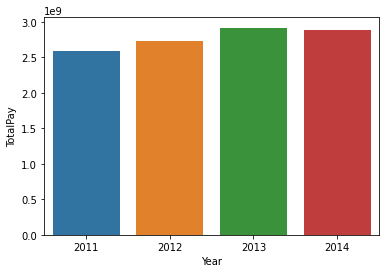

In [20]:
sns.barplot(year_wise_increament.Year, year_wise_increament.TotalPay)

### Q2.Compute how much total salary cost has increased from year 2011 to 2014. Check the mean salary cost per year and see how it has increased per year

In [23]:
# Q3.Which Job Title in Year 2014 has highest mean salary?
year_wise_increament_mean = all_clean_salary.groupby('Year').sum().astype(np.int64)['TotalPay']
year_wise_increament_mean = pd.DataFrame(year_wise_increament)
year_wise_increament_mean

,Year,TotalPay
0,2011,71744
1,2012,74113
2,2013,78808
3,2014,75463


In [108]:
salary_in_2011 = year_wise_increament_mean.iloc[0].TotalPay
salary_in_2014 = year_wise_increament_mean.iloc[3].TotalPay

change_in_salary = salary_in_2014-salary_in_2011
print(f"Total change in salary from 2011 to 2014 is \033[1m{change_in_salary}")

Total change in salary from 2011 to 2014 is 3719


## 3  Which Job Title in Year 2014 has highest mean salary?

In [107]:
highest_mean_salary = all_clean_salary.query("Year == 2014")[['JobTitle','TotalPayBenefits','Year']].groupby('JobTitle').agg('mean')


total_salary_ranking = highest_mean_salary[highest_mean_salary.TotalPayBenefits==max(highest_mean_salary.TotalPayBenefits)].reset_index().iloc[0]
print(f"The highest salary is \033[1m{total_salary_ranking.JobTitle}\033[0m and salary is \033[1m{total_salary_ranking.TotalPayBenefits}")

The highest salary is Chief Investment Officer and salary is 436224.36


### Q4.How much money could have been saved in Year 2014 by stopping OverTimePay

In [43]:
money_to_save = sum(all_clean_salary[(all_clean_salary.Year==2014) & (all_clean_salary.OvertimePay!='Not Provided')]['OvertimePay'].astype(np.float))

In [45]:
print(f"{money_to_save} unit money is save if we stop ovetime pay")

205918599.27000067 unit money is save if we stop ovetime pay


## Q5.Which are the top 5 common job in Year 2014 and how much do they cost the city ?

In [119]:
most_common = all_clean_salary.query("Year==2014").groupby(["Year", "JobTitle"]).agg("count").filter(["Year", "TotalPay", "JobTitle"]).reset_index()
most_common.sort_values('TotalPay',ascending = False).head()

,Year,JobTitle,TotalPay
939,2014,Transit Operator,2479
843,2014,Special Nurse,1478
724,2014,Registered Nurse,1234
713,2014,Public Svc Aide-Public Works,916
365,2014,Firefighter,815


In [ ]:
# Q6. Who was the top earning employee across all the years

In [ ]:
# Q7. Top 5 jobs in which there are majority of the people

In [ ]:
# Q8. Total number of job titles which contain Captain

In [ ]:
# Q9. Find Average BasePay of Employees Having Job Title ACCOUNTANT

In [ ]:
# 10. Plot the scatter plot displaying : Total Pay Benefits vs Total Pay